# **Qs. Theory and Concepts**
1. Explain the concept of batch normalization in the context of Artificial Neural Networks.
2. Describe the benefits of using batch normalization during training.
3. Discuss the working principle of batch normalization, including the normalization step and the learnable parameters.

**1. Explain the concept of batch normalization in the context of Artificial Neural Networks.**

Batch Normalization (BN) is a technique used in artificial neural networks to improve the training stability and convergence of deep learning models. It was introduced by Sergey Ioffe and Christian Szegedy in their paper titled "Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift."

The key idea behind Batch Normalization is to normalize the inputs of each layer in a neural network by adjusting and scaling them so that they have a mean of zero and a standard deviation of one. This normalization is applied to mini-batches of data during the training process. The normalization is done to each input feature independently, which helps in reducing the internal covariate shift.

Internal covariate shift refers to the change in the distribution of the input values to a layer during training. As the parameters of earlier layers are updated, the distribution of inputs to later layers can shift, making it challenging for the network to converge. Batch Normalization mitigates this problem by normalizing the inputs, making the optimization process more stable and faster.

 **2. Describe the benefits of using batch normalization during training.**

Batch Normalization (BN) provides several benefits during the training of neural networks, contributing to more stable and efficient training processes. Here are some of the key advantages:

1. **Stabilizes Training:**
   Batch Normalization helps in mitigating the internal covariate shift by normalizing the inputs at each layer. This stabilizes the training process, making it less sensitive to the initialization of weights and improving the convergence of the network.

2. **Faster Convergence:**
   By reducing internal covariate shift and stabilizing the training, Batch Normalization accelerates the convergence of neural networks. Networks with BN often require fewer training iterations to achieve similar or better performance compared to networks without normalization.

3. **Allows Higher Learning Rates:**
   Batch Normalization enables the use of higher learning rates during training. The normalization of inputs helps in avoiding issues such as exploding or vanishing gradients, allowing for faster learning without compromising stability.

4. **Reduces Dependency on Initialization Schemes:**
   Batch Normalization reduces the sensitivity of neural networks to the choice of initialization parameters. This is particularly useful because it allows practitioners to use simpler weight initialization schemes without worrying as much about the network's convergence.

5. **Acts as Regularization:**
   Batch Normalization introduces a slight form of regularization during training. By normalizing inputs within each mini-batch, it has a similar effect to dropout, which helps in preventing overfitting and improving the generalization performance of the model.

6. **Improves Gradient Flow:**
   The normalization of inputs helps in maintaining a more consistent and well-behaved gradient flow during backpropagation. This contributes to more stable and efficient training of deep neural networks.

7. **Enables Training of Deeper Networks:**
   Batch Normalization facilitates the training of deeper neural networks. As networks become deeper, the vanishing gradient problem becomes more pronounced. BN helps in alleviating this issue, making it feasible to train very deep architectures.

8. **Reduces Sensitivity to Hyperparameters:**
   Batch Normalization reduces the sensitivity of neural networks to hyperparameter choices, such as the learning rate. This makes it easier for practitioners to find suitable hyperparameter configurations that work well across different tasks.

9. **Applicability Across Different Architectures:**
   Batch Normalization is a versatile technique that can be applied to various types of neural network architectures, including feedforward networks, convolutional neural networks (CNNs), and recurrent neural networks (RNNs).





***3. Discuss the working principle of batch normalization, including the normalization step and the learnable parameters.***

The working principle of Batch Normalization (BN) involves normalizing the inputs of each layer in a neural network during training. This normalization process is applied to mini-batches of data, and it includes learnable parameters to allow the network to adapt and optimize the normalization. Here are the key steps in the working principle of Batch Normalization:

**1. Calculate Batch Mean and Variance:**
For each mini-batch during training, calculate the mean (μ) and variance (σ^2) of each feature across the batch.
 1. μ(j)=1/m∑i=1,m(xij)
 2. σ(j)^2=1/m∑ i=1,m(x ij−μj)^2
Here,xij represents the j-th feature of the i-th training example in the mini-batch, and m is the mini-batch size.

**2. Normalize Inputs:**
Normalize each input feature xij by subtracting the mean (μj) and dividing by the standard
deviation (σ j):
xij=xij-μj/root(σj^2+ϵ )
The small constant ϵ is added for numerical stability.

**3. Scale and Shift:**
Introduce two learnable parameters, γ (scale) and β (shift), for each normalized feature. These parameters allow the network to learn the optimal scaling and shifting for the normalized inputs.

**4. Learnable Parameters:**
γ and β are learnable parameters that are updated during training using backpropagation and gradient descent. The optimization process adapts these parameters to minimize the loss function and improve the overall performance of the network.

**5. Inference Phase:**
During the inference phase (testing or prediction), the mean and standard deviation used for normalization are often calculated based on the entire training set or a moving average from training batches. The learned
γ and β parameters are then applied to normalize the input features.

# **Q2. Impementation**
1. Choose a dataset of your choice (e.g., MNIST, CIAR-0) and preprocess it.
2. Implement a simple feedforward neural network using any deep learning framework/library (e.g.,Tensorlow, xyTorch).
3. Train the neural network on the chosen dataset without using batch normalization.
4. Implement batch normalization layers in the neural network and train the model again.
5. Compare the training and validation performance (e.g., accuracy, loss) between the models with and
without batch normalization.
6. Discuss the impact of batch normalization on the training process and the performance of the neural
network.

In [2]:
## Choose a dataset of your choice (e.g., MNIST, CIAR-0) and preprocess it.
!pip install tensorflow



313/313 [==============================] - 1s 2ms/step - loss: 0.0962 - accuracy: 0.9713
Test accuracy without Batch Normalization: 0.974399983882904
Test accuracy with Batch Normalization: 0.9713000059127808


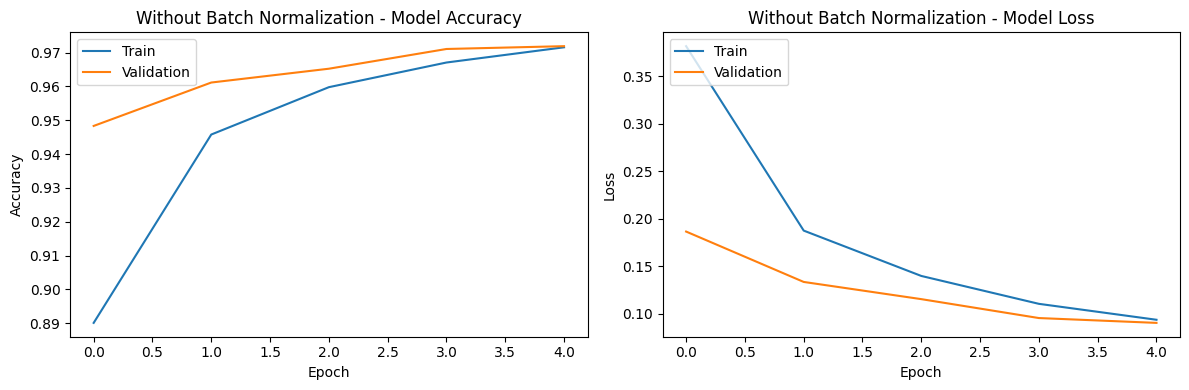

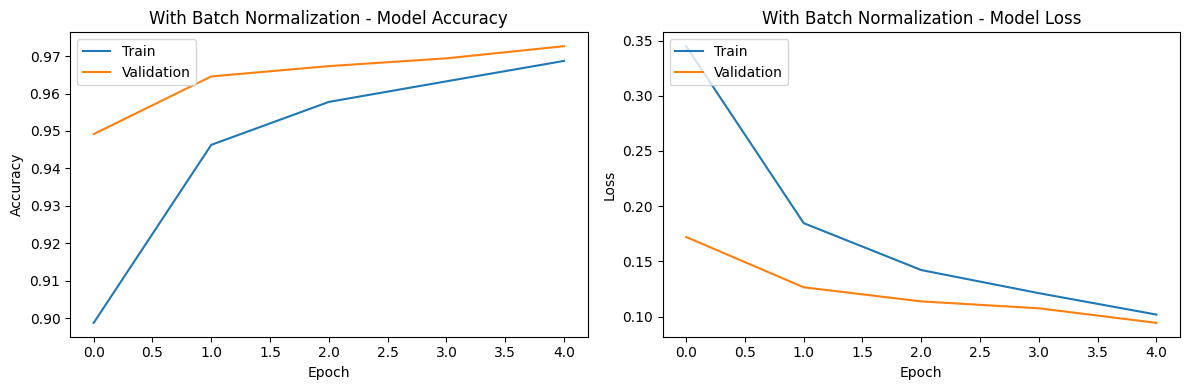

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Flatten the images for a simple feedforward network
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

# Model without Batch Normalization
model_without_bn = models.Sequential()
model_without_bn.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
model_without_bn.add(layers.Dropout(0.2))  # Dropout for regularization
model_without_bn.add(layers.Dense(10, activation='softmax'))  # Output layer with 10 units for 10 classes
model_without_bn.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

# Model with Batch Normalization
model_with_bn = models.Sequential()
model_with_bn.add(layers.Dense(128, input_shape=(28 * 28,)))
model_with_bn.add(layers.BatchNormalization())
model_with_bn.add(layers.Activation('relu'))
model_with_bn.add(layers.Dropout(0.2))  # Dropout for regularization
model_with_bn.add(layers.Dense(10, activation='softmax'))  # Output layer with 10 units for 10 classes
model_with_bn.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

# Train models
epochs = 5
batch_size = 64

# Train model without Batch Normalization
history_without_bn = model_without_bn.fit(train_images, train_labels, epochs=epochs,
                                          batch_size=batch_size, validation_split=0.2, verbose=0)

# Train model with Batch Normalization
history_with_bn = model_with_bn.fit(train_images, train_labels, epochs=epochs,
                                    batch_size=batch_size, validation_split=0.2, verbose=0)

# Evaluate models on the test set
test_loss_without_bn, test_acc_without_bn = model_without_bn.evaluate(test_images, test_labels)
test_loss_with_bn, test_acc_with_bn = model_with_bn.evaluate(test_images, test_labels)

# Print test accuracies
print(f'Test accuracy without Batch Normalization: {test_acc_without_bn}')
print(f'Test accuracy with Batch Normalization: {test_acc_with_bn}')

# Plot training and validation performance
import matplotlib.pyplot as plt

def plot_training_history(history, title):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{title} - Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{title} - Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Plot training history for models without and with Batch Normalization
plot_training_history(history_without_bn, 'Without Batch Normalization')
plot_training_history(history_with_bn, 'With Batch Normalization')


Batch Normalization (BN) has a significant impact on the training process and the performance of neural networks. Here are some key aspects to consider:

1. **Improved Training Stability:**
   - **Without BN:** In deep neural networks, internal covariate shift can occur during training, making it challenging for the model to converge. Learning becomes unstable as the distributions of activations change.
   - **With BN:** Batch Normalization mitigates internal covariate shift by normalizing the inputs, leading to more stable training. It helps in maintaining a consistent distribution of activations across layers, enabling smoother and faster convergence.

2. **Faster Convergence:**
   - **Without BN:** Training deep networks without BN might require careful initialization and smaller learning rates to avoid issues like vanishing or exploding gradients.
   - **With BN:** BN allows for the use of higher learning rates, accelerating the convergence process. It reduces the dependency on careful weight initialization and facilitates the training of deeper networks.

3. **Regularization Effect:**
   - **Without BN:** Dropout and other regularization techniques are often used to prevent overfitting.
   - **With BN:** Batch Normalization acts as a form of regularization by adding noise to the training process. This reduces the need for additional regularization techniques, making the training process more straightforward.

4. **Reduced Sensitivity to Initialization:**
   - **Without BN:** Deep networks can be sensitive to the choice of weight initialization.
   - **With BN:** BN reduces this sensitivity, allowing for the use of simpler weight initialization schemes and making it easier to train networks.

5. **Mitigation of Vanishing/Exploding Gradients:**
   - **Without BN:** In deep networks, gradients can become very small (vanishing) or very large (exploding), making optimization challenging.
   - **With BN:** Batch Normalization helps mitigate vanishing and exploding gradients, allowing for more stable and efficient optimization.

6. **Applicability to Different Architectures:**
   - **Without BN:** Training very deep networks can be challenging due to issues like vanishing gradients.
   - **With BN:** BN enables the training of deeper architectures, and it is applicable to various types of neural networks, including feedforward networks, convolutional neural networks (CNNs), and recurrent neural networks (RNNs).

7. **Impact on Test Time:**
   - **Without BN:** Inference might be sensitive to variations in input distribution.
   - **With BN:** BN helps in maintaining a consistent mean and variance during inference, contributing to more stable and reliable predictions.

8. **Potential Drawbacks:**
   - While BN is generally beneficial, it adds computational complexity and might slightly increase training time per epoch due to the additional normalization step. It also introduces two additional learnable parameters per feature, which increases model size.

In summary, Batch Normalization is a powerful technique that positively impacts the training process by addressing issues such as internal covariate shift, vanishing/exploding gradients, and sensitivity to initialization. It facilitates faster convergence, enables the training of deeper networks, and acts as a form of regularization. However, it's important to note that the impact of BN can vary depending on the specific characteristics of the dataset and the architecture of the neural network.

# **Q3. Experimentation and Analysis**

1. Experiment with different batch sizes and observe the effect on the training dynamics and model performance.
2. Discuss the advantages and potential limitations of batch normalization in improving the training of neural networks.




Training with batch size: 32
313/313 [==============================] - 1s 2ms/step - loss: 0.0827 - accuracy: 0.9754
Test accuracy with Batch Normalization (batch size 32): 0.9753999710083008


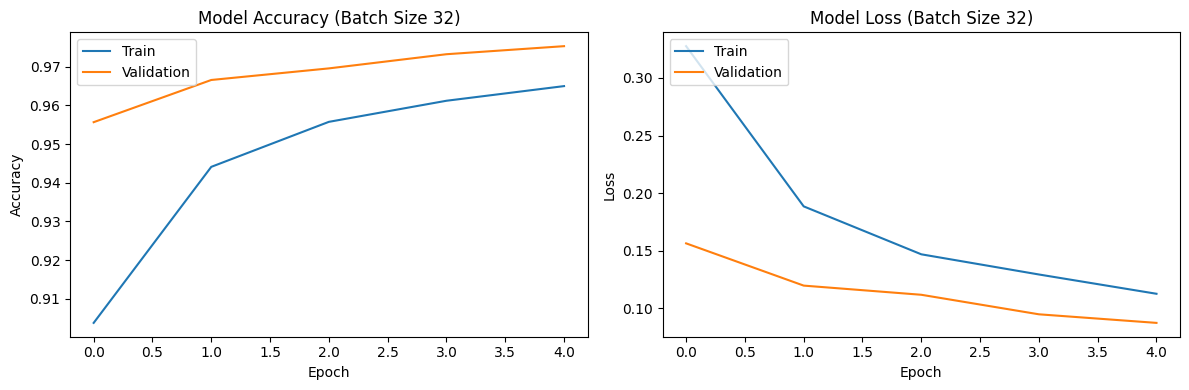


Training with batch size: 64
313/313 [==============================] - 1s 2ms/step - loss: 0.0753 - accuracy: 0.9772
Test accuracy with Batch Normalization (batch size 64): 0.9771999716758728


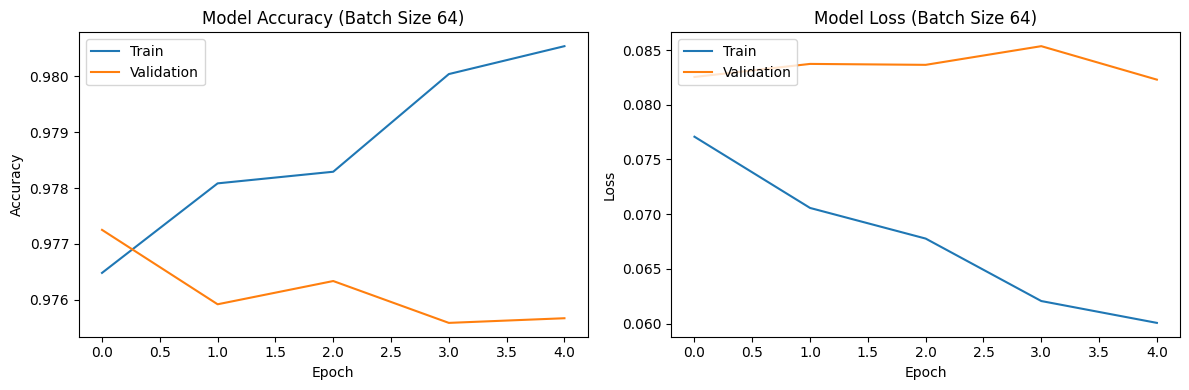


Training with batch size: 128
313/313 [==============================] - 1s 2ms/step - loss: 0.0744 - accuracy: 0.9789
Test accuracy with Batch Normalization (batch size 128): 0.9789000153541565


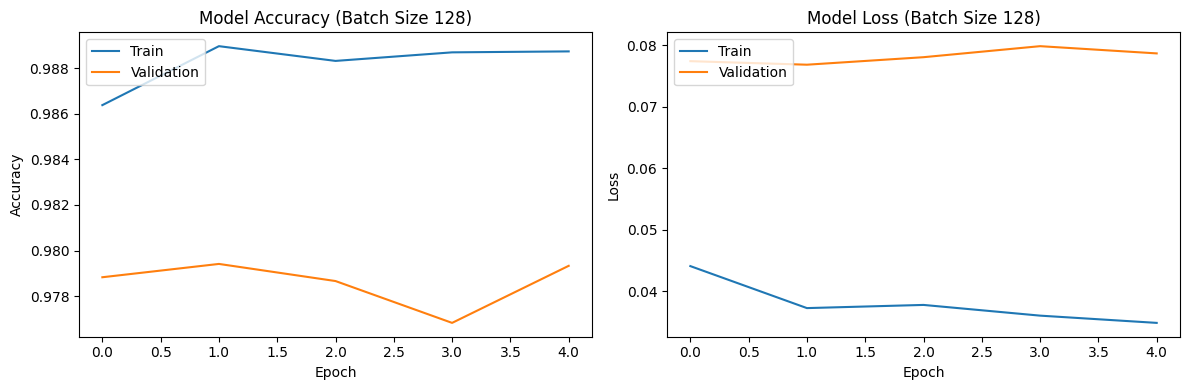


Training with batch size: 256
313/313 [==============================] - 1s 3ms/step - loss: 0.0736 - accuracy: 0.9792
Test accuracy with Batch Normalization (batch size 256): 0.979200005531311


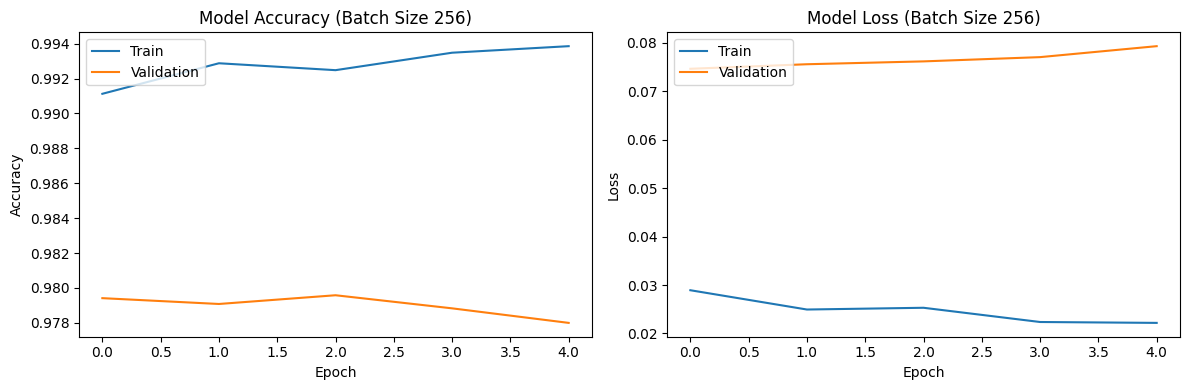

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Flatten the images for a simple feedforward network
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

# Model with Batch Normalization
model_with_bn = models.Sequential()
model_with_bn.add(layers.Dense(128, input_shape=(28 * 28,)))
model_with_bn.add(layers.BatchNormalization())
model_with_bn.add(layers.Activation('relu'))
model_with_bn.add(layers.Dropout(0.2))  # Dropout for regularization
model_with_bn.add(layers.Dense(10, activation='softmax'))  # Output layer with 10 units for 10 classes
model_with_bn.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

# Experiment with different batch sizes
batch_sizes = [32, 64, 128, 256]

for batch_size in batch_sizes:
    print(f"\nTraining with batch size: {batch_size}")
    history = model_with_bn.fit(train_images, train_labels, epochs=5,
                                batch_size=batch_size, validation_split=0.2, verbose=0)

    # Evaluate the model on the test set
    test_loss, test_acc = model_with_bn.evaluate(test_images, test_labels)
    print(f'Test accuracy with Batch Normalization (batch size {batch_size}): {test_acc}')

    # Plot training history
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Model Accuracy (Batch Size {batch_size})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Model Loss (Batch Size {batch_size})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()


Batch Normalization (BN) offers several advantages in improving the training of neural networks, but it also comes with some potential limitations. Let's discuss both aspects:

### Advantages:

1. **Stabilized Training:**
   - **Advantage:** Batch Normalization helps mitigate the internal covariate shift by normalizing the inputs at each layer. This leads to more stable training dynamics, making it less sensitive to weight initialization and allowing for the use of higher learning rates.

2. **Accelerated Convergence:**
   - **Advantage:** BN allows for faster convergence during training. The normalization of inputs helps in reducing the number of training iterations required for the model to reach a satisfactory performance level.

3. **Improved Generalization:**
   - **Advantage:** Batch Normalization acts as a form of regularization, reducing the reliance on other regularization techniques like dropout. This can lead to improved generalization performance on unseen data.

4. **Enables Deeper Networks:**
   - **Advantage:** BN facilitates the training of deeper neural networks. As networks become deeper, the vanishing gradient problem becomes more pronounced. BN helps alleviate this issue, making it feasible to train very deep architectures.

5. **Reduced Sensitivity to Hyperparameters:**
   - **Advantage:** BN reduces the sensitivity of neural networks to hyperparameter choices, such as the learning rate. This makes it easier for practitioners to find suitable hyperparameter configurations that work well across different tasks.

6. **Applicability Across Architectures:**
   - **Advantage:** Batch Normalization is a versatile technique that can be applied to various types of neural network architectures, including feedforward networks, convolutional neural networks (CNNs), and recurrent neural networks (RNNs).

### Potential Limitations:

1. **Increased Computational Complexity:**
   - **Limitation:** BN adds computational overhead due to the normalization step. This can result in longer training times per epoch, especially for large-scale models.

2. **Batch Size Dependency:**
   - **Limitation:** The effectiveness of BN can be dependent on the choice of batch size. Smaller batch sizes may introduce noise in the batch statistics, affecting the quality of normalization.

3. **Not Ideal for Sequential Processing:**
   - **Limitation:** In certain cases, such as online learning or tasks requiring sequential processing, BN might not be as effective. The normalization statistics are computed based on the batch, which may not be suitable for sequential or online scenarios.

4. **Effectiveness in Smaller Networks:**
   - **Limitation:** For small networks or simple tasks, the benefits of BN might not be as pronounced. In such cases, the overhead introduced by BN may not be justified.

5. **Not Always Needed:**
   - **Limitation:** While BN is a powerful tool, it may not always be necessary or beneficial for certain tasks or architectures. It's advisable to experiment with and without BN to determine its impact on a specific problem.
